# board_creation

- Creating an aruco checker patterned board

In [1]:
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

aruco = cv2.aruco
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = (10.0, 10.0)

save_board_dirpath = os.path.join(os.getcwd(), "../board/")
board_filename = "sample_board"
board_save_format = ".png"

parameters = aruco.DetectorParameters_create()
dictionaryID = aruco.DICT_5X5_100
dictionary = aruco.getPredefinedDictionary(dictionaryID)
squareL = 0.028
markerL = 0.024
pixels_per_mm = 10 # for checker board image
A4size = (210, 297)
tb, lr = [5,5] # minimum margin (height, width) when printing in mm

In [4]:
def imshow_inline(img_path="", img=None):
    if img is None:
        if not img_path:
            print("Give imshow_inline an image path or an image data.")
            return -1
        else:
            img = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


def max_within_upper(num, upper):
    i = 1
    while True:
        if num*i > upper:
            return ([i-1, int(num*(i-1))])
        else:
            i += 1

# unit: mm
squareNumX, boardSizeX = max_within_upper(squareL*1000, 
                                          A4size[0]- lr*2 )
squareNumY, boardSizeY = max_within_upper(squareL*1000, 
                                          A4size[1]- tb*2 )


def get_board_image():
    board = aruco.CharucoBoard_create(squareNumX, 
                                      squareNumY, 
                                      squareL, 
                                      markerL, 
                                      dictionary)
    
    # The third parameter is the (optional) margin in pixels, 
    # so none of the markers are touching the image border.
    # Finally, the size of the marker border, 
    # similarly to drawMarker() function. 
    # The default value is 1.
    boardImage = board.draw((boardSizeX*pixels_per_mm, 
                             boardSizeY*pixels_per_mm), 
                             None, 0, 1) # 10 pixels/mm
    return(board, boardImage)


def add_margin(pil_img, tb_pixels, lr_pixels):
    width, height = pil_img.size
    new_width = width + lr_pixels
    new_height = height + tb_pixels
    result = Image.new(pil_img.mode, (new_width,new_height), (255))
    result.paste(pil_img, (int(lr_pixels/2), int(tb_pixels/2)))
    return result


def output_board_configs_to_csv(output_filename):
    with open(output_filename, 'w', newline='') as csvfile:
        config_writer = csv.writer(csvfile, lineterminator='\n')
        config_writer.writerow(['dictionary ID', dictionaryID])
        config_writer.writerow(['square length', squareL])
        config_writer.writerow(['marker length', markerL])
        config_writer.writerow(['number of squares (x and y)', 
                                squareNumX, squareNumY])
        config_writer.writerow(['minimum margin (tb and lr)', 
                                tb, lr])


def create_ChArUco_board_in_A4size(board_name, outcsv=True):
    board, boardImage, = get_board_image()
    
    # add the margin to the image
    tb_pixels = (A4size[1] - boardSizeY) * pixels_per_mm
    lr_pixels = (A4size[0] - boardSizeX) * pixels_per_mm
    boardImage_margin = np.asarray(
        add_margin(Image.fromarray(boardImage), 
                   tb_pixels, lr_pixels))
    
    if not os.path.isdir(save_board_dirpath):
        os.mkdir(save_board_dirpath)
    
    board_filepath = os.path.join(save_board_dirpath, board_name)
    cv2.imwrite(board_filepath, 
                boardImage_margin)
    imshow_inline(img_path=board_filepath)
    
    if outcsv:
        # remove the extention from the board_name
        filename = os.path.splitext(board_name)[0]
        output_board_configparams_to_csv(
            os.path.join(save_board_dirpath, 
                         filename+'.csv'))


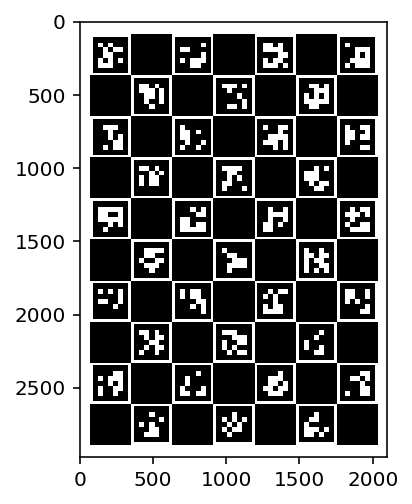

In [5]:
if __name__ == '__main__':
    create_ChArUco_board_in_A4size(board_filename+board_save_format)